# **Content-aware image restoration (CARE) 2D**

<font size = 4>CARE is a neural network capable of image restoration from corrupted bio-images, first published in 2018 by [Weigert *et al.* in Nature Methods](https://www.nature.com/articles/s41592-018-0216-7). The network allows image denoising and resolution improvement in 2D and 3D images, in a supervised training manner. The function of the network is essentially determined by the set of images provided in the training dataset. For instance, if noisy images are provided as input and high signal-to-noise ratio images are provided as targets, the network will perform denoising.


---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the *Zero-Cost Deep-Learning to Enhance Microscopy* project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is based on the following paper: 

<font size = 4>**Content-aware image restoration: pushing the limits of fluorescence microscopy**, Nature Methods, Volume 15. pages 1090–1097(2018) by *Martin Weigert, Uwe Schmidt, Tobias Boothe, Andreas Müller, Alexandr Dibrov, Akanksha Jain, Benjamin Wilhelm, Deborah Schmidt, Coleman Broaddus, Siân Culley, Mauricio Rocha-Martins, Fabián Segovia-Miranda, Caren Norden, Ricardo Henriques, Marino Zerial, Michele Solimena, Jochen Rink, Pavel Tomancak, Loic Royer, Florian Jug & Eugene W. Myers* (https://www.nature.com/articles/s41592-018-0216-7)

<font size = 4>And source code found in: https://github.com/csbdeep/csbdeep

<font size = 4>For a more in-depth description of the features of the network,please refer to [this guide](http://csbdeep.bioimagecomputing.com/doc/) provided by the original authors of the work.

<font size = 4>We provide a dataset for the training of this notebook as a way to test its functionalities but the training and test data of the restoration experiments is also available from the authors of the original paper [here](https://publications.mpi-cbg.de/publications-sites/7207/).


<font size = 4>**Please also cite this original paper when using or developing this notebook.**

# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---
<font size = 4> For CARE to train, **it needs to have access to a paired training dataset**. This means that the same image needs to be acquired in the two conditions (for instance, low signal-to-noise ratio and high signal-to-noise ratio) and provided with indication of correspondence.

<font size = 4> Therefore, the data structure is important. It is necessary that all the input data are in the same folder and that all the output data is in a separate folder. The provided training dataset is already split in two folders called "Training - Low SNR images" (Training_source) and "Training - high SNR images" (Training_target). Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model (Quality control dataset)**. The quality control assessment can be done directly in this notebook.

<font size = 4> **Additionally, the corresponding input and output files need to have the same name**.

<font size = 4> Please note that you currently can **only use .tif files!**


<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Low SNR images (Training_source)
        - img_1.tif, img_2.tif, ...
      - High SNR images (Training_target)
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - Low SNR images
        - img_1.tif, img_2.tif
      - High SNR images
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Initialise the Colab session**
---







## **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator: GPU** *(Graphics processing unit)*


In [ ]:
#@markdown ##Run this cell to check if you have GPU access
%tensorflow_version 1.x


import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **2. Install CARE and Dependencies**
---


In [ ]:
#@markdown ##Install CARE and dependencies

#Libraries contains information of certain topics. 
#For example the tifffile library contains information on how to handle tif-files.

#Here, we install libraries which are not already included in Colab.
!pip install tifffile # contains tools to operate tiff-files
!pip install csbdeep  # contains tools for restoration of fluorescence microcopy images (Content-aware Image Restoration, CARE). It uses Keras and Tensorflow.
!pip install wget
!pip install memory_profiler
%load_ext memory_profiler

#Here, we import and enable Tensorflow 1 instead of Tensorflow 2.
%tensorflow_version 1.x
import tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tensorflow.__version__)
print("Tensorflow enabled.")

# ------- Variable specific to CARE -------
from csbdeep.utils import download_and_extract_zip_file, plot_some, axes_dict, plot_history, Path, download_and_extract_zip_file
from csbdeep.data import RawData, create_patches 
from csbdeep.io import load_training_data, save_tiff_imagej_compatible
from csbdeep.models import Config, CARE
from csbdeep import data
from __future__ import print_function, unicode_literals, absolute_import, division
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# ------- Common variable to all ZeroCostDL4Mic notebooks -------
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil 
import zipfile
from tifffile import imread, imsave
import time
import sys
import wget
from pathlib import Path
import pandas as pd
import csv
from glob import glob
from scipy import signal
from scipy import ndimage
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32
from skimage.util import img_as_ubyte
from tqdm import tqdm 


# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'

#Disable some of the tensorflow warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries installed")

     |████████████████████████████████| 71kB 4.9MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=09830c674dbcddfea62a4d9e0e1617bf252ea95a4642b638529dd5262c29c0d9
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-cp36-none-any.whl size=28992 sha256=90c19cd241500122d4a0c2cd37dd4ffb8fad6f75a4f2d2b700945501e1d2dd24
  Stored in directory: /root/.cache/pip/wheels/74/20/b5/20964ef97be73d2c3a695c9cad7bccd96d1e3e737a8163861f
Successfully built memory-profiler
TensorFlow 1.x selected.
Instructions for updating:
non-resource variables are not supported in the long term
1.15.2
Tensorflow enabled.


Using TensorFlow backend.


Libraries installed


# **3. Select your parameters and paths**

---


## **3.1. Setting main training parameters**
---
<font size = 4>




<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source (Low SNR images) and Training_target (High SNR images or ground truth) training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).

<font size = 5>**Training Parameters**

<font size = 4>**`number_of_epochs`:**Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a few (10-30) epochs, but a full training should run for 100-300 epochs. Evaluate the performance after training (see 5). **Default value: 50**

<font size = 4>**`patch_size`:** CARE divides the image into patches for training. Input the size of the patches (length of a side). The value should be smaller than the dimensions of the image and divisible by 8. **Default value: 80**

<font size = 4>**When choosing the patch_size, the value should be i) large enough that it will enclose many instances, ii) small enough that the resulting patches fit into the RAM.**<font size = 4> 

<font size = 4>**`number_of_patches`:** Input the number of the patches per image. Increasing the number of patches allows for larger training datasets. **Default value: 100** 

<font size = 4>**Decreasing the patch size or increasing the number of patches may improve the training but may also increase the training time.**

<font size = 5>**Advanced Parameters - experienced users only**

<font size = 4>**`number_of_steps`:** Define the number of training steps by epoch. By default this parameter is calculated so that each patch is seen at least once per epoch. **Default value: Number of patch / batch_size**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 16**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during training. **Default value: 10** 

<font size = 4>**`initial_learning_rate`:** Input the initial value to be used as learning rate. **Default value: 0.0004**

Default advanced parameters enabled
Loaded Input images (number, width, length) = (2027, 800, 500)
Loaded Output images (number, width, length) = (2027, 800, 500)
Parameters initiated.
Image dimensions (y,x) (800, 500)


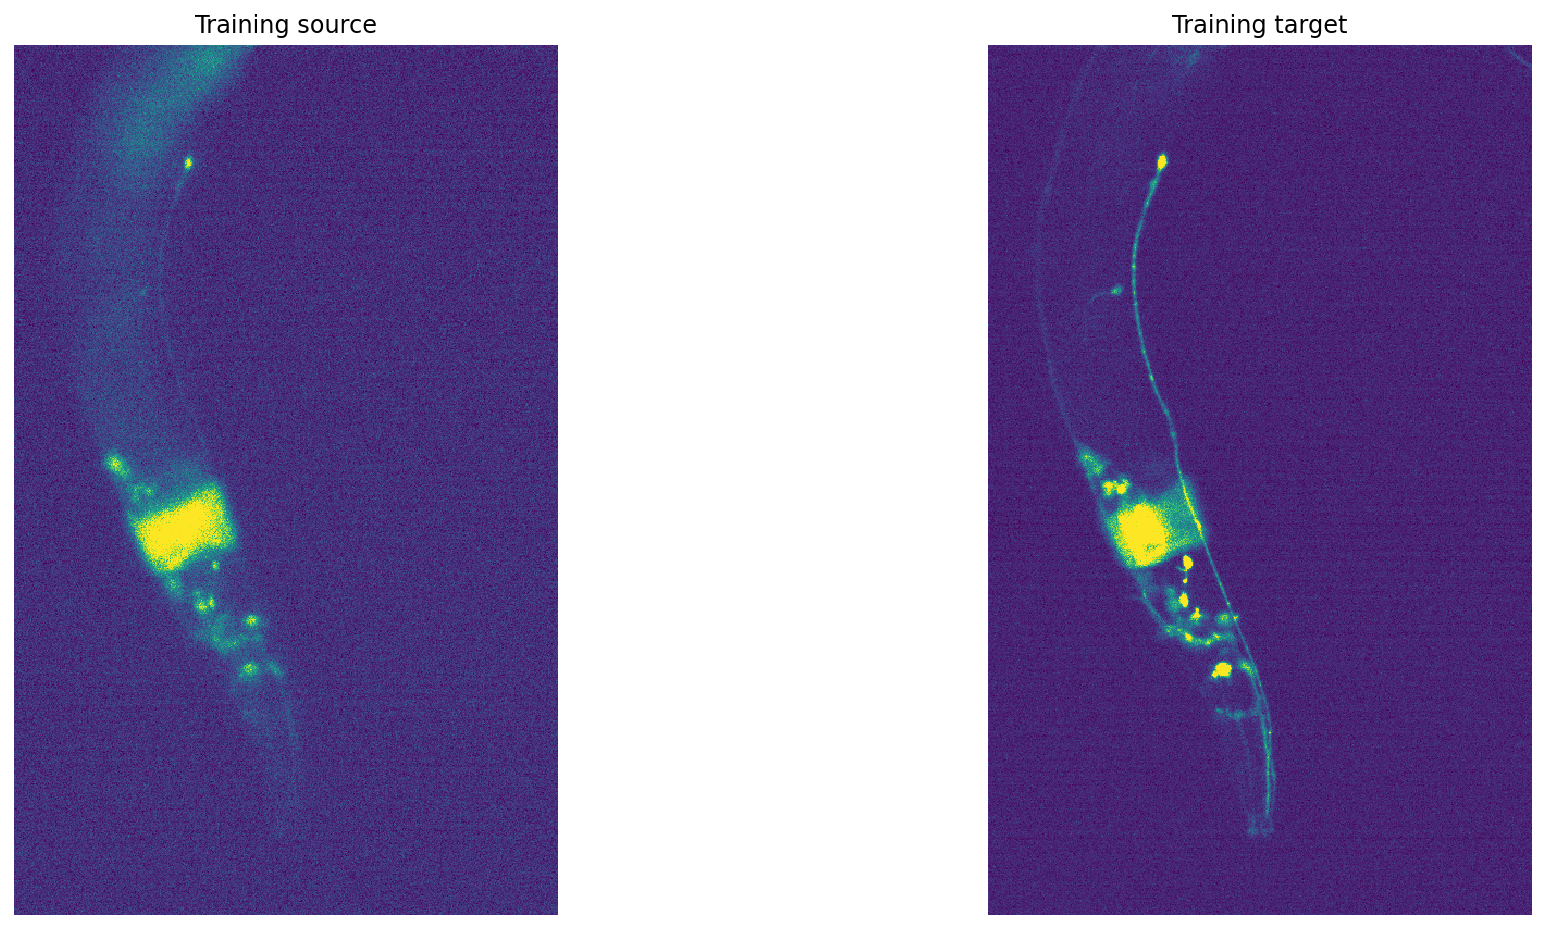

In [ ]:
#@markdown ###Path to training images:

Training_source = "/content/gdrive/My Drive/Neuron_images_MSB426/Low" #@param {type:"string"}
InputFile = Training_source+"/*.tif"

Training_target = "/content/gdrive/My Drive/Neuron_images_MSB426/Max" #@param {type:"string"}
OutputFile = Training_target+"/*.tif"

#Define where the patch file will be saved
base = "/content"


# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "Model_02072020_Aug" #@param {type:"string"}
model_path = "/content/gdrive/My Drive/cloud_colab/CARE_WORMS1/models" #@param {type:"string"}

# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of epochs:
number_of_epochs =  100#@param {type:"number"}

#@markdown Patch size (pixels) and number
patch_size =  64#@param {type:"number"} # in pixels
number_of_patches =   10#@param {type:"number"}

#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please input:

number_of_steps =   400#@param {type:"number"}
batch_size =  16#@param {type:"number"}
percentage_validation =  10 #@param {type:"number"}
initial_learning_rate = 0.0004 #@param {type:"number"}


if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 16
  percentage_validation = 10
  initial_learning_rate = 0.0004

#Here we define the percentage to use for validation
percentage = percentage_validation/100


#here we check that no model with the same name already exist, if so delete
if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: Folder already exists and has been removed !!")
  shutil.rmtree(model_path+'/'+model_name)


# Here we disable pre-trained model by default (in case the  cell is not ran)
Use_pretrained_model = False

# Here we disable data augmentation by default (in case the cell is not ran)

Use_Data_augmentation = False

# The shape of the images.
x = imread(InputFile)
y = imread(OutputFile)

print('Loaded Input images (number, width, length) =', x.shape)
print('Loaded Output images (number, width, length) =', y.shape)
print("Parameters initiated.")

# This will display a randomly chosen dataset input and output
random_choice = random.choice(os.listdir(Training_source))
x = imread(Training_source+"/"+random_choice)


# Here we check that the input images contains the expected dimensions
if len(x.shape) == 2:
  print("Image dimensions (y,x)",x.shape)

if not len(x.shape) == 2:
  print(bcolors.WARNING +"Your images appear to have the wrong dimensions. Image dimension",x.shape)


#Find image XY dimension
Image_Y = x.shape[0]
Image_X = x.shape[1]

#Hyperparameters failsafes

# Here we check that patch_size is smaller than the smallest xy dimension of the image 

if patch_size > min(Image_Y, Image_X):
  patch_size = min(Image_Y, Image_X)
  print (bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_size is divisible by 8
if not patch_size % 8 == 0:
    patch_size = ((int(patch_size / 8)-1) * 8)
    print (bcolors.WARNING + " Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is now:",patch_size)


os.chdir(Training_target)
y = imread(Training_target+"/"+random_choice)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, norm=simple_norm(x, percent = 99), interpolation='nearest')
plt.title('Training source')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, norm=simple_norm(y, percent = 99), interpolation='nearest')
plt.title('Training target')
plt.axis('off');



## **3.2. Data augmentation**
---
<font size = 4>




<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4> **However, data augmentation is not a magic solution and may also introduce issues. Therefore, we recommend that you train your network with and without augmentation, and use the QC section to validate that it improves overall performances.** 

<font size = 4>Data augmentation is performed here by [Augmentor.](https://github.com/mdbloice/Augmentor)

<font size = 4>[Augmentor](https://github.com/mdbloice/Augmentor) was described in the following article:

<font size = 4>Marcus D Bloice, Peter M Roth, Andreas Holzinger, Biomedical image augmentation using Augmentor, Bioinformatics, https://doi.org/10.1093/bioinformatics/btz259

<font size = 4>**Please also cite this original paper when publishing results obtained using this notebook with augmentation enabled.** 

In [ ]:
#Data augmentation

Use_Data_augmentation = True #@param {type:"boolean"}

if Use_Data_augmentation:
  !pip install Augmentor
  import Augmentor


#@markdown ####Choose a factor by which you want to multiply your original dataset

Multiply_dataset_by = 2 #@param {type:"slider", min:1, max:30, step:1}

Save_augmented_images = True #@param {type:"boolean"}

Saving_path = "/content/gdrive/My Drive/Neuron_images_MSB426/Augmentation" #@param {type:"string"}


Use_Default_Augmentation_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please choose the probability of the following image manipulations to be used to augment your dataset (1 = always used; 0 = disabled ):

#@markdown ####Mirror and rotate images
rotate_90_degrees = 0 #@param {type:"slider", min:0, max:1, step:0.1}

rotate_270_degrees = 0 #@param {type:"slider", min:0, max:1, step:0.1}

flip_left_right = 0 #@param {type:"slider", min:0, max:1, step:0.1}

flip_top_bottom = 0 #@param {type:"slider", min:0, max:1, step:0.1}

#@markdown ####Random image Zoom

random_zoom = 0 #@param {type:"slider", min:0, max:1, step:0.1}

random_zoom_magnification = 0 #@param {type:"slider", min:0, max:1, step:0.1}

#@markdown ####Random image distortion

random_distortion = 0 #@param {type:"slider", min:0, max:1, step:0.1}


#@markdown ####Image shearing and skewing  

image_shear = 0 #@param {type:"slider", min:0, max:1, step:0.1}
max_image_shear = 1 #@param {type:"slider", min:1, max:25, step:1}

skew_image = 0 #@param {type:"slider", min:0, max:1, step:0.1}

skew_image_magnitude = 0 #@param {type:"slider", min:0, max:1, step:0.1}


if Use_Default_Augmentation_Parameters:
  rotate_90_degrees = 0.5
  rotate_270_degrees = 0.5
  flip_left_right = 0.5
  flip_top_bottom = 0.5

  if not Multiply_dataset_by >5:
    random_zoom = 0
    random_zoom_magnification = 0.9
    random_distortion = 0
    image_shear = 0
    max_image_shear = 10
    skew_image = 0
    skew_image_magnitude = 0

  if Multiply_dataset_by >5:
    random_zoom = 0.1
    random_zoom_magnification = 0.9
    random_distortion = 0.5
    image_shear = 0.2
    max_image_shear = 5
    skew_image = 0.2
    skew_image_magnitude = 0.4

  if Multiply_dataset_by >25:
    random_zoom = 0.5
    random_zoom_magnification = 0.8
    random_distortion = 0.5
    image_shear = 0.5
    max_image_shear = 20
    skew_image = 0.5
    skew_image_magnitude = 0.6


list_files = os.listdir(Training_source)
Nb_files = len(list_files)

Nb_augmented_files = (Nb_files * Multiply_dataset_by)


if Use_Data_augmentation:
  print("Data augmentation enabled")
# Here we set the path for the various folder were the augmented images will be loaded

# All images are first saved into the augmented folder
  #Augmented_folder = "/content/Augmented_Folder"
  
  if not Save_augmented_images:
    Saving_path= "/content"

  Augmented_folder =  Saving_path+"/Augmented_Folder"
  if os.path.exists(Augmented_folder):
    shutil.rmtree(Augmented_folder)
  os.makedirs(Augmented_folder)

  #Training_source_augmented = "/content/Training_source_augmented"
  Training_source_augmented = Saving_path+"/Training_source_augmented"

  if os.path.exists(Training_source_augmented):
    shutil.rmtree(Training_source_augmented)
  os.makedirs(Training_source_augmented)

  #Training_target_augmented = "/content/Training_target_augmented"
  Training_target_augmented = Saving_path+"/Training_target_augmented"

  if os.path.exists(Training_target_augmented):
    shutil.rmtree(Training_target_augmented)
  os.makedirs(Training_target_augmented)


# Here we generate the augmented images
#Load the images
  p = Augmentor.Pipeline(Training_source, Augmented_folder)

#Define the matching images
  p.ground_truth(Training_target)
#Define the augmentation possibilities
  if not rotate_90_degrees == 0:
    p.rotate90(probability=rotate_90_degrees)
  
  if not rotate_270_degrees == 0:
    p.rotate270(probability=rotate_270_degrees)

  if not flip_left_right == 0:
    p.flip_left_right(probability=flip_left_right)

  if not flip_top_bottom == 0:
    p.flip_top_bottom(probability=flip_top_bottom)

  if not random_zoom == 0:
    p.zoom_random(probability=random_zoom, percentage_area=random_zoom_magnification)
 
  if not random_distortion == 0:
    p.random_distortion(probability=random_distortion, grid_width=4, grid_height=4, magnitude=8)

  if not image_shear == 0:
    p.shear(probability=image_shear,max_shear_left=20,max_shear_right=20)
  
  if not skew_image == 0:
    p.skew(probability=skew_image,magnitude=skew_image_magnitude)

  p.sample(int(Nb_augmented_files))

  print(int(Nb_augmented_files),"matching images generated")

# Here we sort through the images and move them back to augmented trainning source and targets folders

  augmented_files = os.listdir(Augmented_folder)

  for f in augmented_files:

    if (f.startswith("_groundtruth_(1)_")):
      shortname_noprefix = f[17:]
      shutil.copyfile(Augmented_folder+"/"+f, Training_target_augmented+"/"+shortname_noprefix) 
    if not (f.startswith("_groundtruth_(1)_")):
      shutil.copyfile(Augmented_folder+"/"+f, Training_source_augmented+"/"+f)
      

  for filename in os.listdir(Training_source_augmented):
    os.chdir(Training_source_augmented)
    os.rename(filename, filename.replace('_original', ''))
  
  #Here we clean up the extra files
  shutil.rmtree(Augmented_folder)

if not Use_Data_augmentation:
  print(bcolors.WARNING+"Data augmentation disabled") 




Data augmentation enabled


Processing:   0%|          | 0/2027 [00:00<?, ? Images/s]

Initialised with 2027 image(s) found.
Output directory set to /content/gdrive/My Drive/Neuron_images_MSB426/Augmentation/Augmented_Folder.

Executing Pipeline:   0%|          | 0/4054 [00:00<?, ? Samples/s]

2027 ground truth image(s) found.


Processing <PIL.Image.Image image mode=I;16 size=800x500 at 0x7FE7690D2588>: 100%|██████████| 4054/4054 [03:18<00:00, 20.44 Samples/s]


4054 matching images generated



## **3.3. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a CARE 2D model**. 

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used. 

In [ ]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}

pretrained_model_choice = "Model_from_file" #@param ["Model_from_file"]

Weights_choice = "best" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")

# --------------------- Download the a model provided in the XXX ------------------------

  if pretrained_model_choice == "Model_name":
    pretrained_model_name = "Model_name"
    pretrained_model_path = "/content/"+pretrained_model_name
    print("Downloading the 2D_Demo_Model_from_Stardist_2D_paper")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)    
    wget.download("", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")

# --------------------- Add additional pre-trained models here ------------------------



# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled, 
  if not os.path.exists(h5_file_path):
    print(bcolors.WARNING+'WARNING: weights_'+Weights_choice+'.h5 pretrained model does not exist')
    Use_pretrained_model = False

  
# If the model path contains a pretrain model, we load the training rate, 
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)
        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]
          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))
          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))
        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead')

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead')
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained network will be used.')



# **4. Train the network**
---

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

 4054 raw images x    1 transformations   =  4054 images
 4054 images     x   10 patches per image = 40540 patches in total
Input data:
/content: target='/content/gdrive/My Drive/Neuron_images_MSB426/Augmentation/Training_target_augmented', sources=['/content/gdrive/My Drive/Neuron_images_MSB426/Augmentation/Training_source_augmented'], axes='CYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
64 x 64


100%|██████████| 4054/4054 [03:29<00:00, 19.39it/s]


Creating 2D training dataset
number of training images:	 36486
number of validation images:	 4054
image size (2D):		 (64, 64)
axes:				 SYXC
channels in / out:		 1 / 1
peak memory: 2853.29 MiB, increment: 0.67 MiB
Config(axes='YXC', n_channel_in=1, n_channel_out=1, n_dim=2, probabilistic=True, train_batch_size=16, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=100, train_learning_rate=0.0004, train_loss='laplace', train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0}, train_steps_per_epoch=2281, train_tensorboard=True, unet_input_shape=(None, None, 1), unet_kern_size=5, unet_last_activation='linear', unet_n_depth=3, unet_n_first=32, unet_residual=True)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.



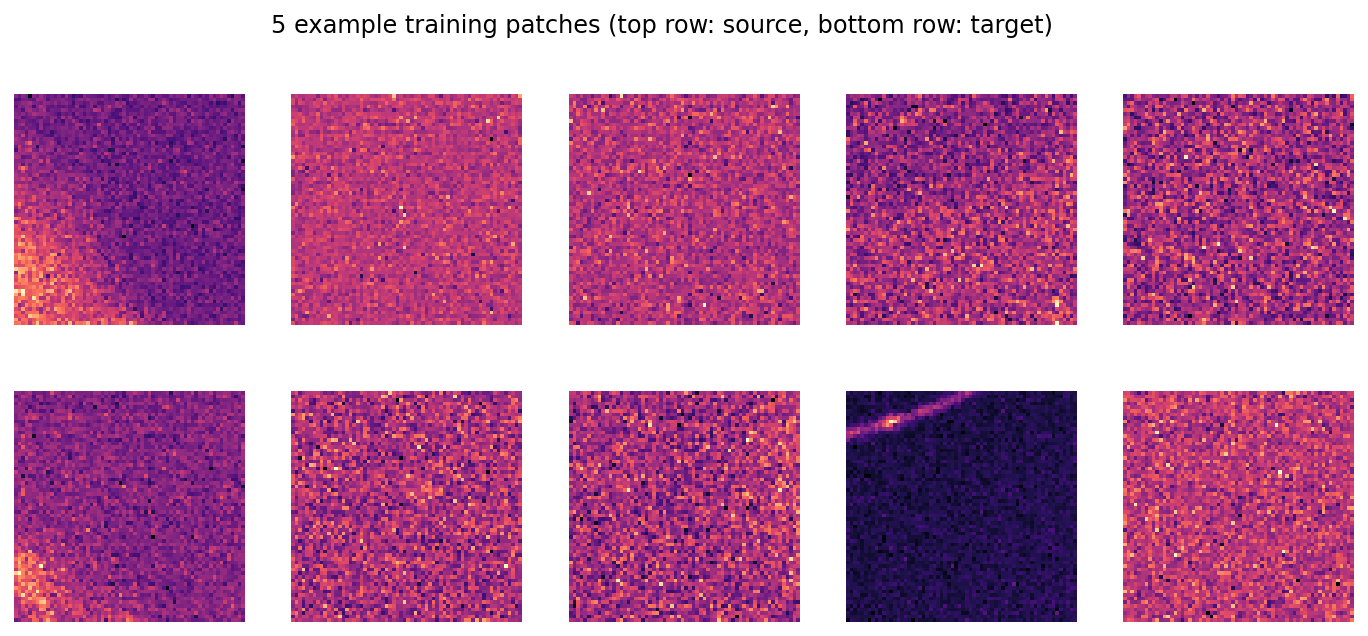

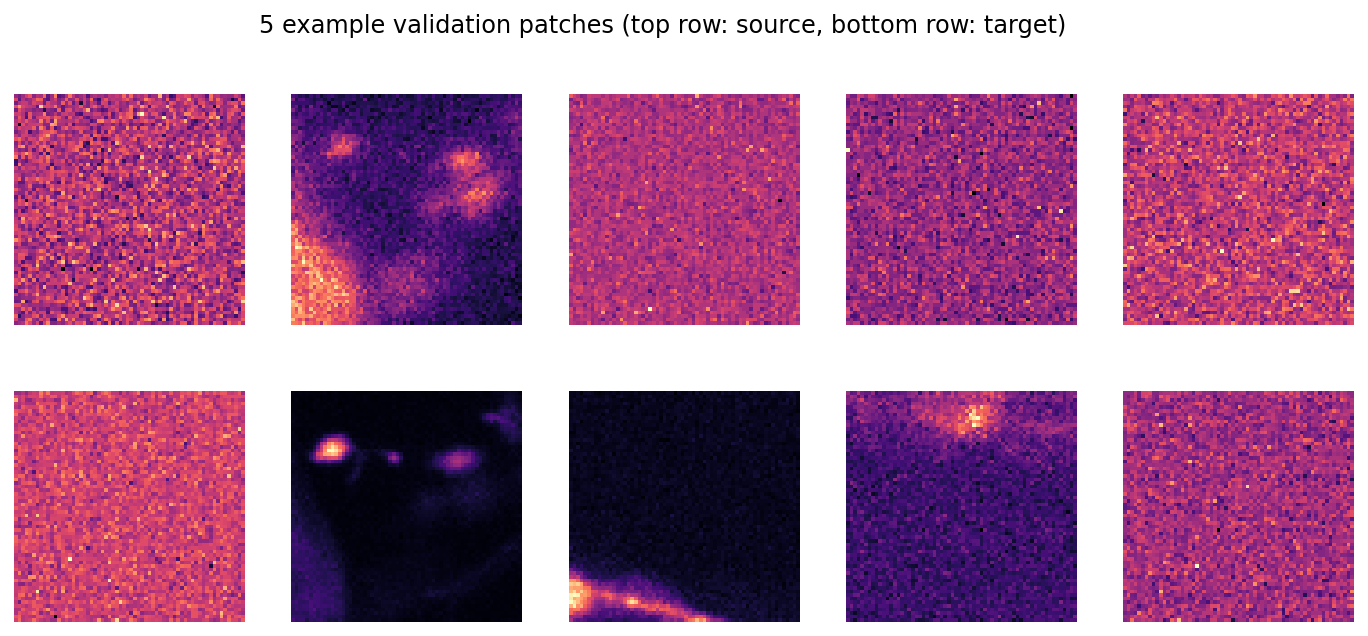

In [ ]:
#@markdown ##Create the model and dataset objects


# --------------------- Here we load the augmented data or the raw data ------------------------

if Use_Data_augmentation:
  Training_source_dir = Training_source_augmented
  Training_target_dir = Training_target_augmented

if not Use_Data_augmentation:
  Training_source_dir = Training_source
  Training_target_dir = Training_target
# --------------------- ------------------------------------------------

# This object holds the image pairs (GT and low), ensuring that CARE compares corresponding images.
# This file is saved in .npz format and later called when loading the trainig data.


raw_data = data.RawData.from_folder(
    basepath=base,
    source_dirs=[Training_source_dir], 
    target_dir=Training_target_dir, 
    axes='CYX', 
    pattern='*.tif*')

X, Y, XY_axes = data.create_patches(
    raw_data, 
    patch_filter=None, 
    patch_size=(patch_size,patch_size), 
    n_patches_per_image=number_of_patches)

print ('Creating 2D training dataset')
training_path = model_path+"/rawdata"
rawdata1 = training_path+".npz"
np.savez(training_path,X=X, Y=Y, axes=XY_axes)

# Load Training Data
(X,Y), (X_val,Y_val), axes = load_training_data(rawdata1, validation_split=percentage, verbose=True)
c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

%memit 

#plot of training patches.
plt.figure(figsize=(12,5))
plot_some(X[:5],Y[:5])
plt.suptitle('5 example training patches (top row: source, bottom row: target)');

#plot of validation patches
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');


#Here we automatically define number_of_step in function of training data and batch size
if (Use_Default_Advanced_Parameters):  
  number_of_steps= int(X.shape[0]/batch_size)+1

# --------------------- Using pretrained model ------------------------
#Here we ensure that the learning rate set correctly when using pre-trained models
if Use_pretrained_model:
  if Weights_choice == "last":
    initial_learning_rate = lastLearningRate

  if Weights_choice == "best":            
    initial_learning_rate = bestLearningRate
# --------------------- ---------------------- ------------------------


#Here we create the configuration file

config = Config(axes, n_channel_in, n_channel_out, probabilistic=True, train_steps_per_epoch=number_of_steps, train_epochs=number_of_epochs, unet_kern_size=5, unet_n_depth=3, train_batch_size=batch_size, train_learning_rate=initial_learning_rate)

print(config)
vars(config)

# Compile the CARE model for network training
model_training= CARE(config, model_name, basedir=model_path)


# --------------------- Using pretrained model ------------------------
# Load the pretrained weights 
if Use_pretrained_model:
  model_training.load_weights(h5_file_path)
# --------------------- ---------------------- ------------------------




## **4.2. Train the network**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches.

In [6]:
start = time.time()

#@markdown ##Start Training

# Start Training
history = model_training.train(X,Y, validation_data=(X_val,Y_val))

print("Training, done.")

# convert the history.history dict to a pandas DataFrame:     
lossData = pd.DataFrame(history.history) 

if os.path.exists(model_path+"/"+model_name+"/Quality Control"):
  shutil.rmtree(model_path+"/"+model_name+"/Quality Control")

os.makedirs(model_path+"/"+model_name+"/Quality Control")

# The training evaluation.csv is saved (overwrites the Files if needed). 
lossDataCSVpath = model_path+'/'+model_name+'/Quality Control/training_evaluation.csv'
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss', 'learning rate'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i], history.history['lr'][i]])


# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/100
2281/2281 [==============================] - 90s 39ms/step - loss: -1.5859 - mse: 0.0093 - mae: 0.0451 - val_loss: -1.7671 - val_mse: 0.0066 - val_mae: 0.0351

Epoch 2/100
2281/2281 [==============================] - 82s 36ms/step - loss: -2.0027 - mse: 0.0059 - mae: 0.0313 - val_loss: -2.2538 - val_mse: 0.0055 - val_mae: 0.0271
Epoch 3/100
2281/2281 [==============================] - 84s 37ms/step - loss: -2.1306 - mse: 0.0054 - mae: 0.0287 - val_loss: -2.0733 - val_mse: 0.0051 - val_mae: 0.0291
Epoch 4/100
2281/2281 [==============================] - 84s 37ms/step - loss: -2.1379 - mse: 0.0054 - mae: 0.0288 - v

##**4.3. Download your model(s) from Google Drive**


---
<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [7]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

QC_model_folder = "/content/gdrive/My Drive/Neuron_images_MSB426/QC_ModelAug" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model): 
  QC_model_name = model_name
  QC_model_path = model_path

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The Model_02072020_Aug network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

<font size = 4>**Note: Plots of the losses will be shown in a linear and in a log scale. This can help visualise changes in the losses at different magnitudes. However, note that if the losses are negative the plot on the log scale will be empty. This is not an error.**

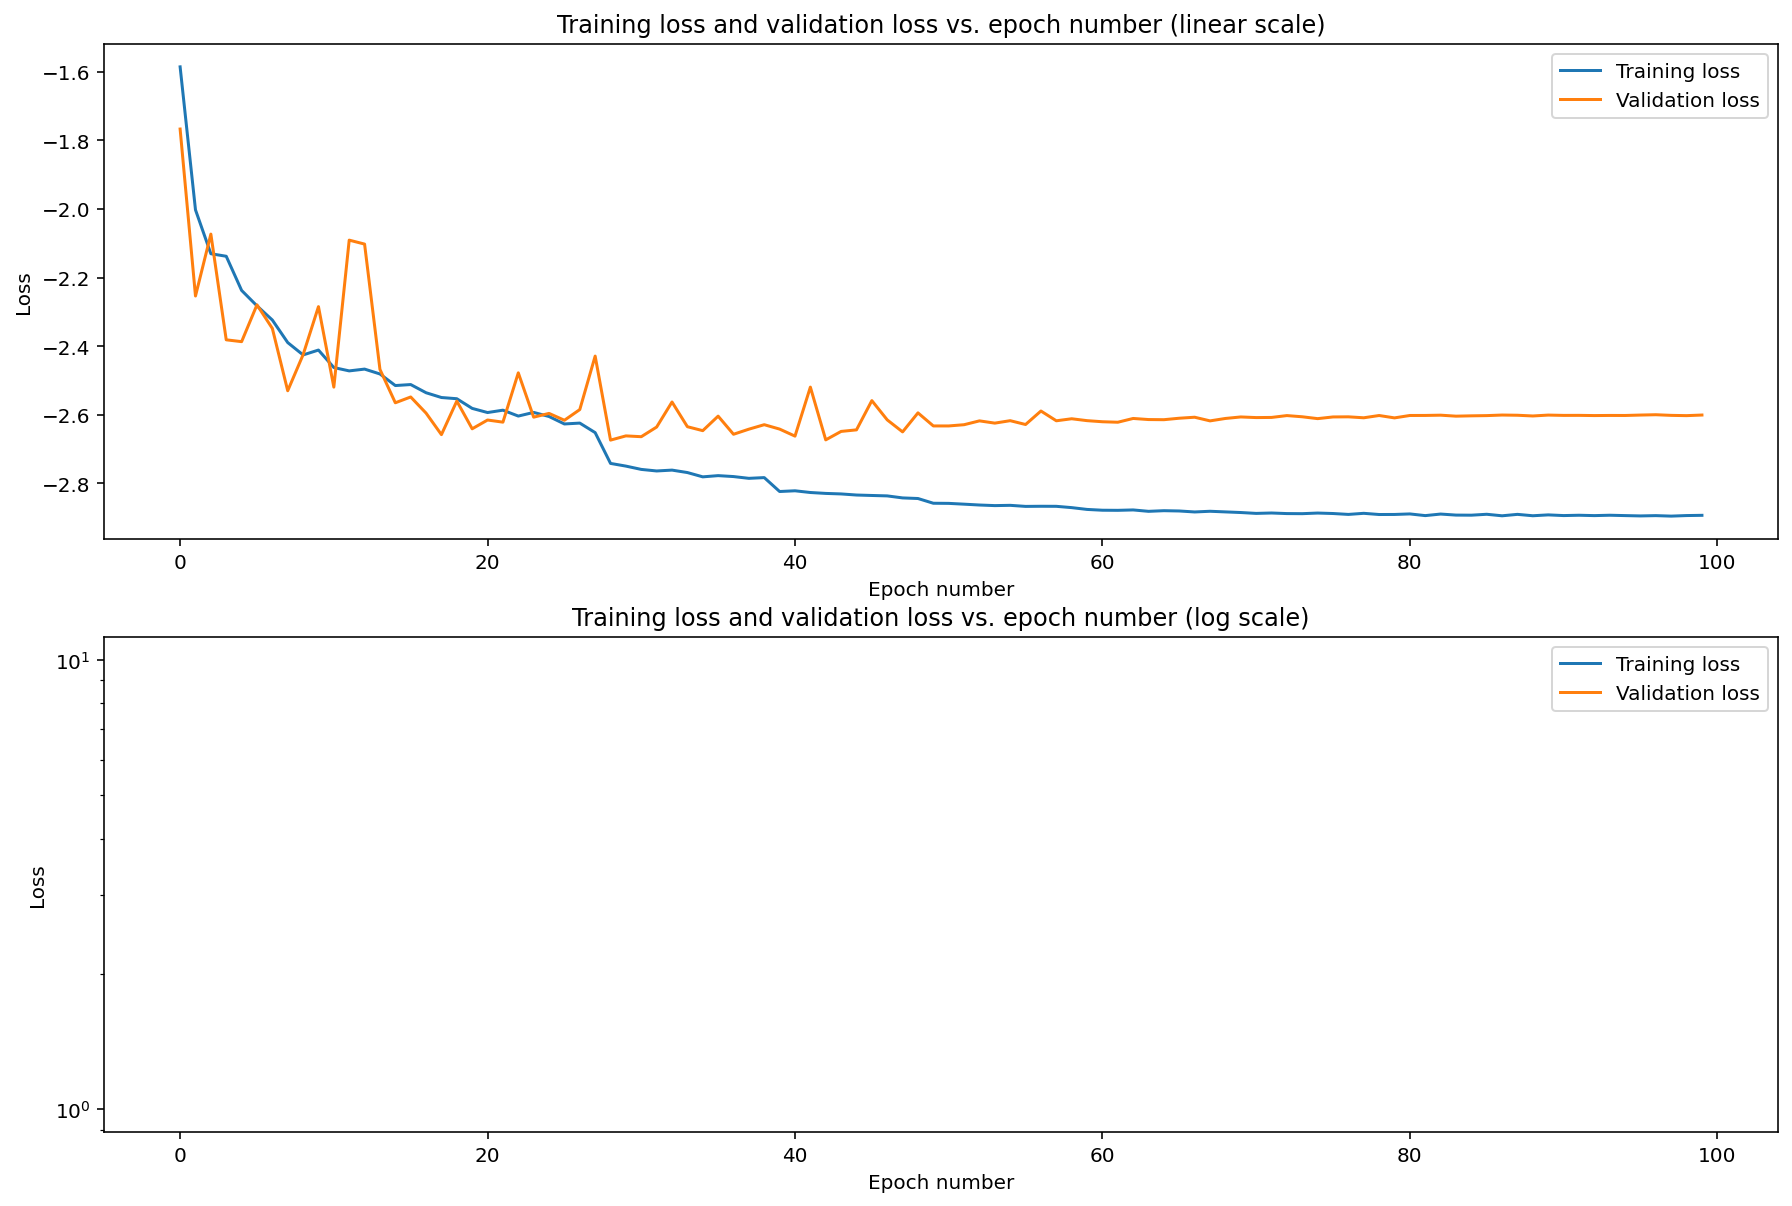

In [8]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number

lossDataFromCSV = []
vallossDataFromCSV = []

with open(QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv','r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(QC_model_path+'/'+QC_model_name+'/Quality Control/lossCurvePlots.png')
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---

<font size = 4>This section will display SSIM maps and RSE maps as well as calculating total SSIM, NRMSE and PSNR metrics for all the images provided in the "Source_QC_folder" and "Target_QC_folder" !

<font size = 4>**1. The SSIM (structural similarity) map** 

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info). 

<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=4>**The output below shows the SSIM maps with the mSSIM**

<font size = 4>**2. The RSE (Root Squared Error) map** 

<font size = 4>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =4>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 4>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=4>**The output below shows the RSE maps with the NRMSE and PSNR values.**





Loading network weights from 'weights_best.h5'.
Number of test dataset found in the folder: 1
Running QC on: 1.tif


Text(0.5, 0, 'NRMSE: 0.094, PSNR: 30.487')

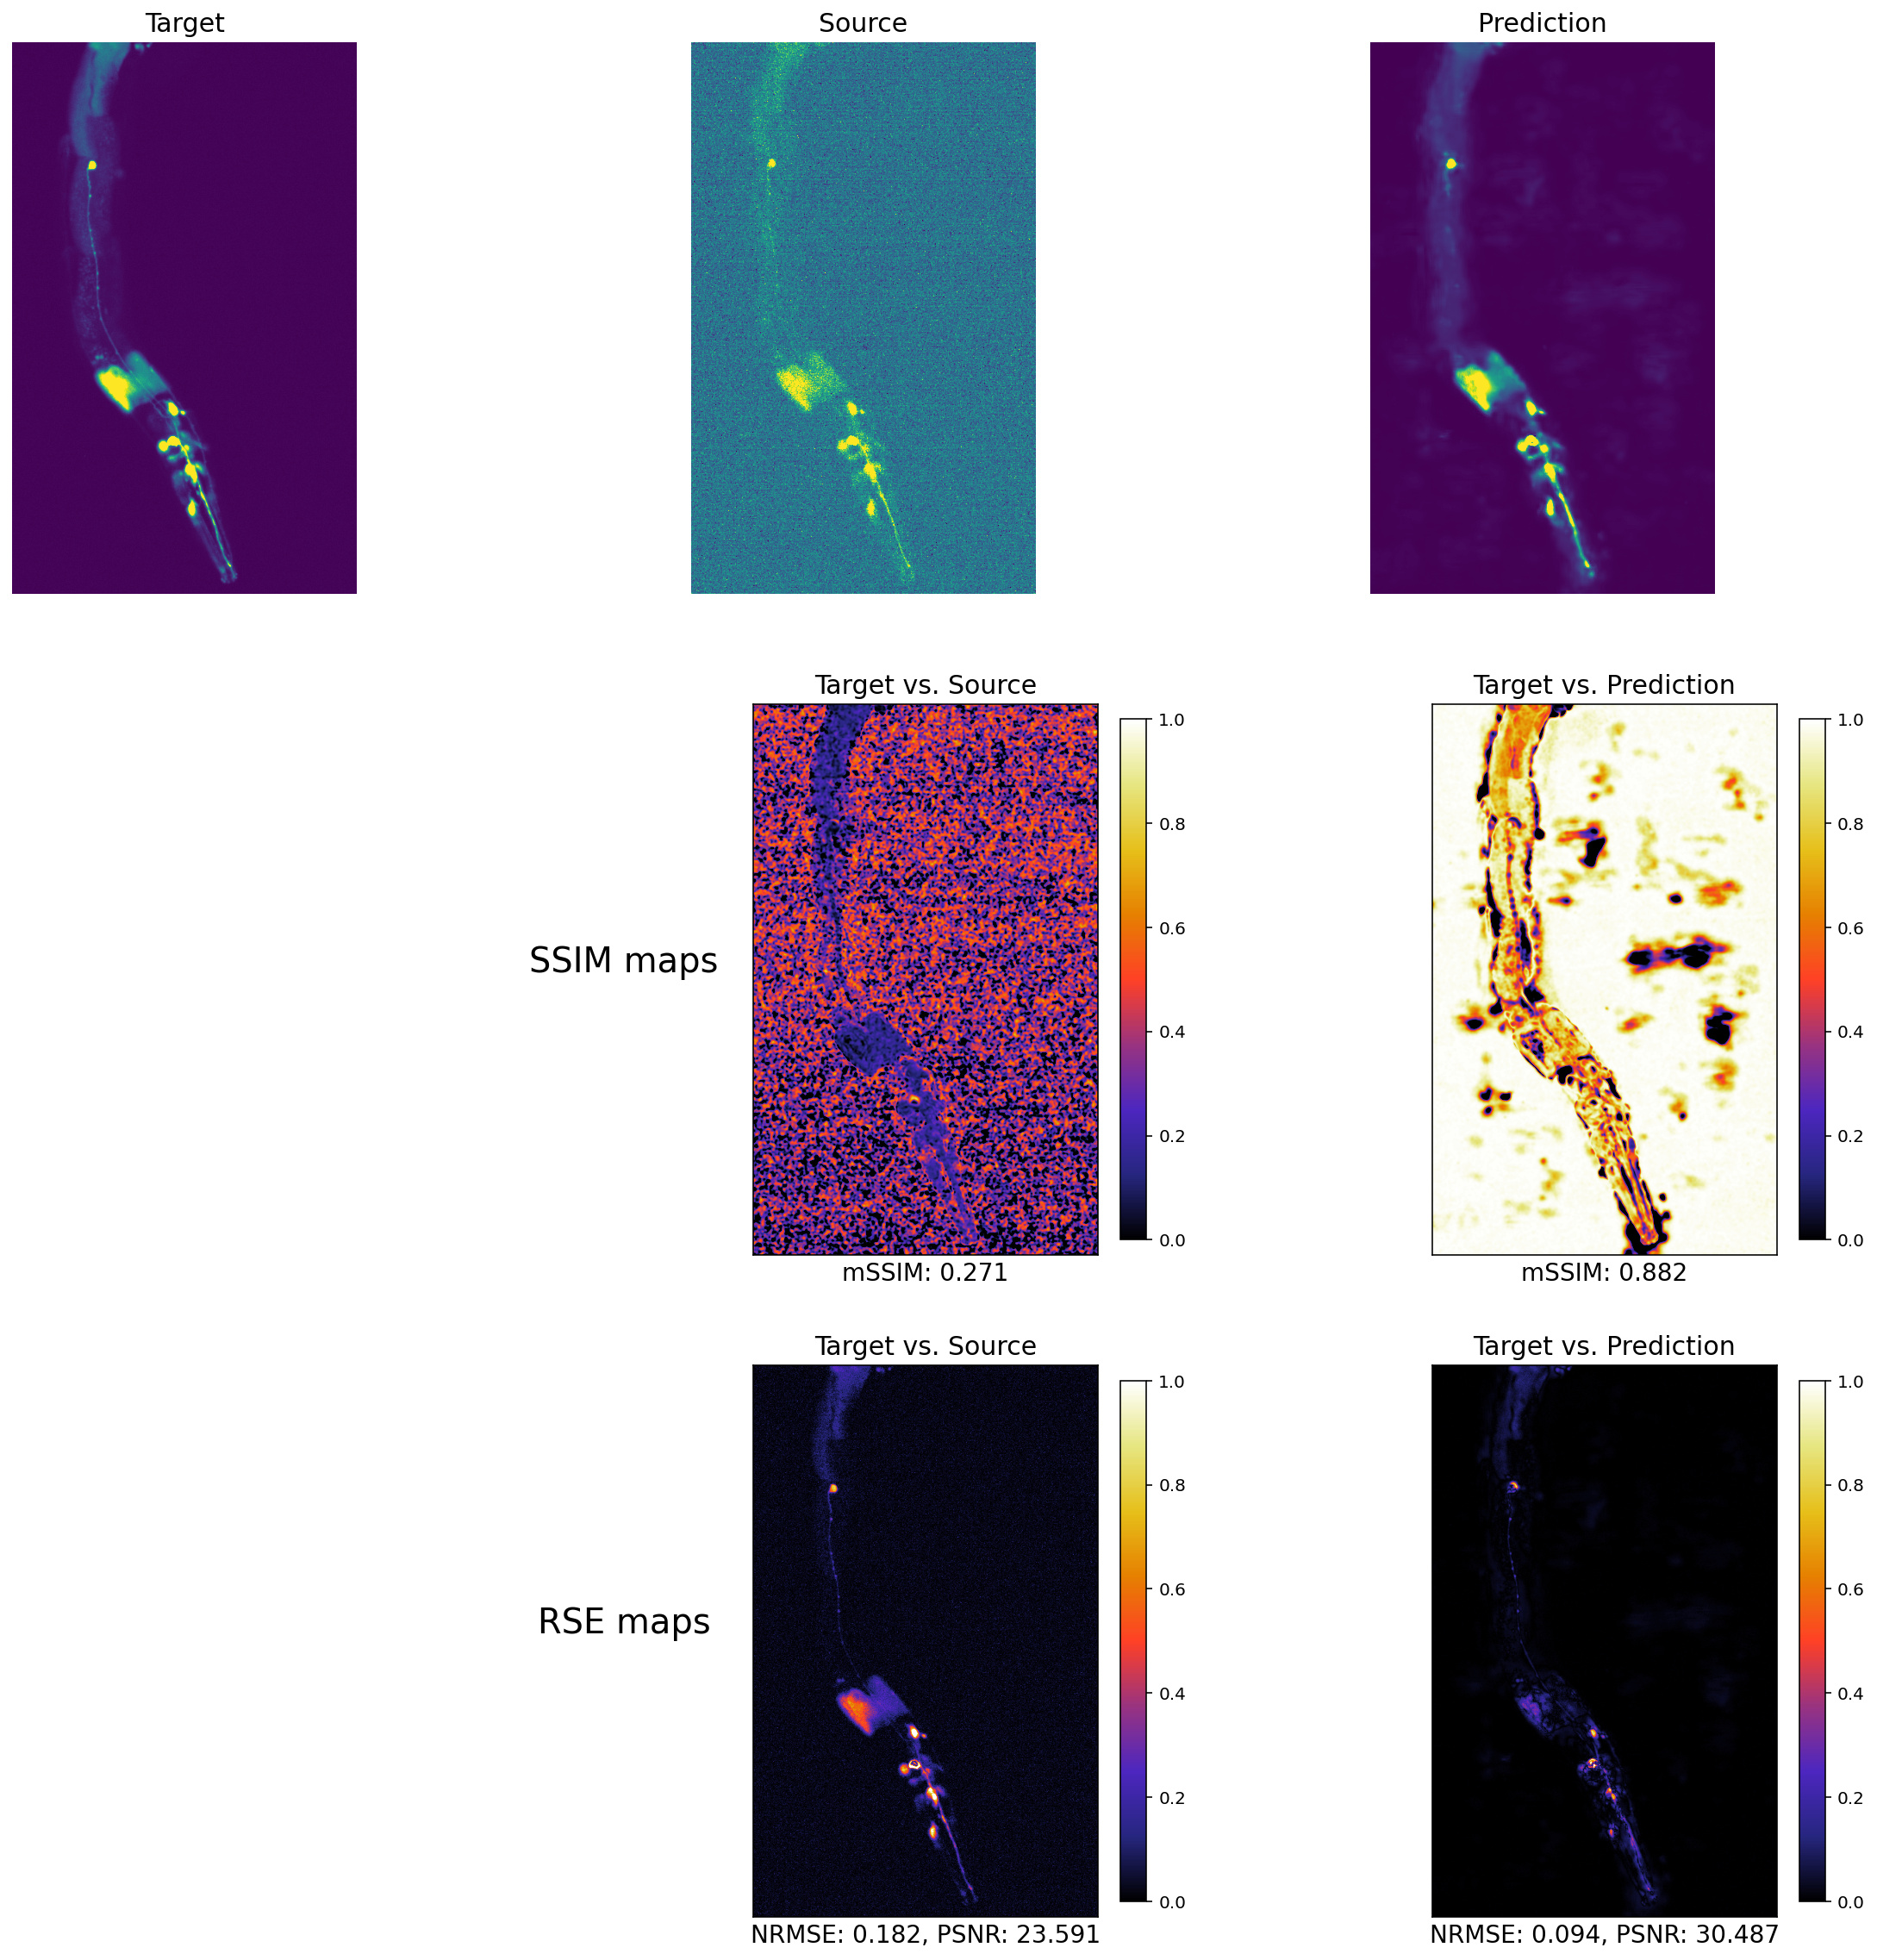

In [10]:
#@markdown ##Choose the folders that contain your Quality Control dataset

Source_QC_folder = "/content/gdrive/My Drive/Test_Neuron/QC/Low" #@param{type:"string"}
Target_QC_folder = "/content/gdrive/My Drive/Test_Neuron/QC/Max" #@param{type:"string"}

# Create a quality control/Prediction Folder
if os.path.exists(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction"):
  shutil.rmtree(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")

os.makedirs(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")

# Activate the pretrained model. 
model_training = CARE(config=None, name=QC_model_name, basedir=QC_model_path)

# List Tif images in Source_QC_folder
Source_QC_folder_tif = Source_QC_folder+"/*.tif"
Z = sorted(glob(Source_QC_folder_tif))
Z = list(map(imread,Z))
print('Number of test dataset found in the folder: '+str(len(Z)))


# Perform prediction on all datasets in the Source_QC folder
for filename in os.listdir(Source_QC_folder):
  img = imread(os.path.join(Source_QC_folder, filename))
  predicted = model_training.predict(img, axes='YX')
  os.chdir(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")
  imsave(filename, predicted)


def ssim(img1, img2):
  return structural_similarity(img1,img2,data_range=1.,full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)


def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x, normalize_gt=True):
    """This function is adapted from Martin Weigert"""

    """
    normalizes and affinely scales an image pair such that the MSE is minimized  
     
    Parameters
    ----------
    gt: ndarray
        the ground truth image      
    x: ndarray
        the image that will be affinely scaled 
    normalize_gt: bool
        set to True of gt image should be normalized (default)
    Returns
    -------
    gt_scaled, x_scaled 
    """
    if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)
    #x = x - np.mean(x)
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)
    #gt = gt - np.mean(gt)
    scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
    return gt, scale * x

# Open and create the csv file that will contain all the QC metrics
with open(QC_model_path+"/"+QC_model_name+"/Quality Control/QC_metrics_"+QC_model_name+".csv", "w", newline='') as file:
    writer = csv.writer(file)

    # Write the header in the csv file
    writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM", "Prediction v. GT NRMSE", "Input v. GT NRMSE", "Prediction v. GT PSNR", "Input v. GT PSNR"])  

    # Let's loop through the provided dataset in the QC folders


    for i in os.listdir(Source_QC_folder):
      if not os.path.isdir(os.path.join(Source_QC_folder,i)):
        print('Running QC on: '+i)
      # -------------------------------- Target test data (Ground truth) --------------------------------
        test_GT = io.imread(os.path.join(Target_QC_folder, i))

      # -------------------------------- Source test data --------------------------------
        test_source = io.imread(os.path.join(Source_QC_folder,i))

      # Normalize the images wrt each other by minimizing the MSE between GT and Source image
        test_GT_norm,test_source_norm = norm_minmse(test_GT, test_source, normalize_gt=True)

      # -------------------------------- Prediction --------------------------------
        test_prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction",i))

      # Normalize the images wrt each other by minimizing the MSE between GT and prediction
        test_GT_norm,test_prediction_norm = norm_minmse(test_GT, test_prediction, normalize_gt=True)        


      # -------------------------------- Calculate the metric maps and save them --------------------------------

      # Calculate the SSIM maps
        index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = ssim(test_GT_norm, test_prediction_norm)
        index_SSIM_GTvsSource, img_SSIM_GTvsSource = ssim(test_GT_norm, test_source_norm)

      #Save ssim_maps
        img_SSIM_GTvsPrediction_32bit = np.float32(img_SSIM_GTvsPrediction)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/SSIM_GTvsPrediction_'+i,img_SSIM_GTvsPrediction_32bit)
        img_SSIM_GTvsSource_32bit = np.float32(img_SSIM_GTvsSource)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/SSIM_GTvsSource_'+i,img_SSIM_GTvsSource_32bit)
      
      # Calculate the Root Squared Error (RSE) maps
        img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
        img_RSE_GTvsSource = np.sqrt(np.square(test_GT_norm - test_source_norm))

      # Save SE maps
        img_RSE_GTvsPrediction_32bit = np.float32(img_RSE_GTvsPrediction)
        img_RSE_GTvsSource_32bit = np.float32(img_RSE_GTvsSource)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/RSE_GTvsPrediction_'+i,img_RSE_GTvsPrediction_32bit)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/RSE_GTvsSource_'+i,img_RSE_GTvsSource_32bit)


      # -------------------------------- Calculate the RSE metrics and save them --------------------------------

      # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
        NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
        NRMSE_GTvsSource = np.sqrt(np.mean(img_RSE_GTvsSource))
        
      # We can also measure the peak signal to noise ratio between the images
        PSNR_GTvsPrediction = psnr(test_GT_norm,test_prediction_norm,data_range=1.0)
        PSNR_GTvsSource = psnr(test_GT_norm,test_source_norm,data_range=1.0)

        writer.writerow([i,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource),str(NRMSE_GTvsPrediction),str(NRMSE_GTvsSource),str(PSNR_GTvsPrediction),str(PSNR_GTvsSource)])


# All data is now processed saved
Test_FileList = os.listdir(Source_QC_folder) # this assumes, as it should, that both source and target are named the same

plt.figure(figsize=(20,20))
# Currently only displays the last computed set, from memory
# Target (Ground-truth)
plt.subplot(3,3,1)
plt.axis('off')
img_GT = io.imread(os.path.join(Target_QC_folder, Test_FileList[-1]))
plt.imshow(img_GT, norm=simple_norm(img_GT, percent = 99))
plt.title('Target',fontsize=15)

# Source
plt.subplot(3,3,2)
plt.axis('off')
img_Source = io.imread(os.path.join(Source_QC_folder, Test_FileList[-1]))
plt.imshow(img_Source, norm=simple_norm(img_Source, percent = 99))
plt.title('Source',fontsize=15)

#Prediction
plt.subplot(3,3,3)
plt.axis('off')
img_Prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction/", Test_FileList[-1]))
plt.imshow(img_Prediction, norm=simple_norm(img_Prediction, percent = 99))
plt.title('Prediction',fontsize=15)

#Setting up colours
cmap = plt.cm.CMRmap

#SSIM between GT and Source
plt.subplot(3,3,5)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)   
imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsSource,3)),fontsize=14)
plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

#SSIM between GT and Prediction
plt.subplot(3,3,6)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)  
imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsPrediction,3)),fontsize=14)

#Root Squared Error between GT and Source
plt.subplot(3,3,8)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False) 
imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource, cmap = cmap, vmin=0, vmax = 1)
plt.colorbar(imRSE_GTvsSource,fraction=0.046,pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsSource,3))+', PSNR: '+str(round(PSNR_GTvsSource,3)),fontsize=14)
#plt.title('Target vs. Source PSNR: '+str(round(PSNR_GTvsSource,3)))
plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)

#Root Squared Error between GT and Prediction
plt.subplot(3,3,9)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False) 
imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsPrediction,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)

# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

In [ ]:
#@markdown ### Provide the path to your dataset and to the folder where the predictions are saved, then play the cell to predict outputs from your unseen images.

Data_folder = "" #@param {type:"string"}
Result_folder = "" #@param {type:"string"}

# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = os.path.join(Prediction_model_path, Prediction_model_name)


if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')



#Activate the pretrained model. 
model_training = CARE(config=None, name=Prediction_model_name, basedir=Prediction_model_path)


# creates a loop, creating filenames and saving them
for filename in os.listdir(Data_folder):
  img = imread(os.path.join(Data_folder,filename))
  restored = model_training.predict(img, axes='YX')
  os.chdir(Result_folder)
  imsave(filename,restored)

print("Images saved into folder:", Result_folder)

## **6.2. Inspect the predicted output**
---



In [ ]:
# @markdown ##Run this cell to display a randomly chosen input and its corresponding predicted output.

# This will display a randomly chosen dataset input and predicted output
random_choice = random.choice(os.listdir(Data_folder))
x = imread(Data_folder+"/"+random_choice)

os.chdir(Result_folder)
y = imread(Result_folder+"/"+random_choice)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(x, norm=simple_norm(x, percent = 99), interpolation='nearest')
plt.title('Input')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(y,  norm=simple_norm(y, percent = 99), interpolation='nearest')
plt.title('Predicted output');


## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.


#**Thank you for using CARE 2D!**